# HW4
CSCI 4930  
Justin Hoang  

## Reading the Dataset

In [149]:
import pandas as pd

In [150]:
spiral_data = pd.read_csv('spiral-dataset.csv', index_col=None, sep=r'\s', header=None)
spiral_data.columns = ['x', 'y', 'target']

spiral_data.head()

/var/folders/pt/_3pv06z57s3_j0w3tq9l60p80000gn/T/ipykernel_41835/2610188471.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  spiral_data = pd.read_csv('spiral-dataset.csv', index_col=None, sep=r'\s', header=None)


,x,y,target
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [151]:
import numpy as np

### Calculate Euclidean Distance Function

In [152]:
# euclidean distance - sqrt of sum squared
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum(p1 - p2) ** 2)

### Create Distance Matrix Function

In [153]:
# distance matrix
def distance_matrix(dataset):
    n = len(dataset)
    
    dist_matrix = np.zeros((n,n))
    
    for i in range(n):
        for k in range(n):
            dist = euclidean_distance(dataset[i], dataset[k])
            dist_matrix[i, k] = dist
            dist_matrix[k, i] = dist
            
    return dist_matrix

### Create Linkage Clustering Function
Single, complete, average, centroid  
Parameters specified by linktype parameters: 1,2,3,4

In [154]:
def link(dataframe, linktype, cols=()):
    dataset = dataframe[list(cols)].to_numpy()
    
    n = len(dataset)
    clusters = [[pt] for pt in range(n)] # init clusters
    initial_dist = distance_matrix(dataset)
    cutoff = 3 # set cutoff from merge
    
    # cluster using the minimum distance until there are only k clusters left
    while len(clusters) > cutoff:
        min_dist = float('inf')
        min_i = -1
        min_k = -1
        
        # iterate through all unique cluster pairs
        for i in range(len(clusters)):
            for k in range(i + 1, len(clusters)):
                
                # single linktype
                if linktype == 1:
                    cluster_dist = float('inf')
                    
                    # compare each point in cluster with every other points
                    for pt_i in clusters[i]:
                        for pt_k in clusters[k]:
                            if initial_dist[pt_i, pt_k] < cluster_dist:
                                cluster_dist = initial_dist[pt_i, pt_k]
                    
                    # new minimum-maximum value found            
                    if cluster_dist < min_dist:
                        min_dist = cluster_dist # find min dist for point pair
                        min_i = i
                        min_k = k
                
                # complete linktype
                if linktype == 2:
                    cluster_dist = float('-inf')
                    
                    # compare each point in cluster with every other points
                    for pt_i in clusters[i]:
                        for pt_k in clusters[k]:
                            if initial_dist[pt_i, pt_k] > cluster_dist:
                                cluster_dist = initial_dist[pt_i, pt_k]
                    
                    # new minimum-maximum value found            
                    if cluster_dist < min_dist:
                        min_dist = cluster_dist
                        min_i = i
                        min_k = k
                
                # average linktype        
                if linktype == 3:
                    total_dist = 0
                    num_pairs = 0
                    
                    # add total distance for points in cluster
                    for pt_i in clusters[i]:
                        for pt_k in clusters[k]:
                            total_dist += initial_dist[pt_i, pt_k]
                            num_pairs += 1
                    
                    # average distance       
                    avg_dist = total_dist / num_pairs if num_pairs > 0 else float('-inf')
                    
                    # new minimum value found
                    if avg_dist < min_dist:
                        min_dist = avg_dist
                        min_i = i
                        min_k = k
                
                # centroid linkage type        
                if linktype == 4:
                    # centroid for i
                    centroid_i = np.zeros(dataset.shape[1])
                    for pt_i in clusters[i]:
                        centroid_i += dataset[pt_i]
                    centroid_i /= len(clusters[i])
                    
                    # centroid for k
                    centroid_k = np.zeros(dataset.shape[1])
                    for pt_k in clusters[k]:
                        centroid_k += dataset[pt_k]
                    centroid_k /= len(clusters[k])
                    
                    # get euclidean distance between centroids
                    centroid_dist = euclidean_distance(centroid_i, centroid_k)
                    
                    # weighted distance with small epsilon to avoid cycles
                    weighted_dist = centroid_dist + (1e-8 *i *k)
                    # new minimum value found
                    if weighted_dist < min_dist:
                        min_dist = weighted_dist
                        min_i = i
                        min_k = k
        
        # merge clusters                
        new_cluster = clusters[min_i] + clusters[min_k]
        
        clusters.pop(max(min_i, min_k))
        clusters.pop(min(min_i, min_k))
        clusters.append(new_cluster)
    
    print(f"Linktype: {linktype}")    
    return clusters


### Single Linkage Clustering

In [155]:
single_link = link(spiral_data, 1, cols=('x', 'y'))

Linktype: 1


### Complete Linkage Clustering

In [156]:
complete_link = link(spiral_data, 2, cols=('x', 'y'))

Linktype: 2


### Average Linkage Clustering

In [157]:
avg_link = link(spiral_data, 3, cols=('x', 'y'))

Linktype: 3


### Centroid Linkage Clustering

In [158]:
centroid_link = link(spiral_data, 4, cols=('x', 'y'))

Linktype: 4


## Plot Linkage Clustering Results

In [159]:
import matplotlib.pyplot as plt

## Plot Data Function

In [160]:
def plot_data(clusters):
    cluster_data_x = [[], [], []]
    cluster_data_y = [[], [], []]
    
    # data points
    for i in clusters[0]:
        data = dataset[i]
        cluster_data_x[0].append(data[0])
        cluster_data_y[0].append(data[1])
        
    for i in clusters[1]:
        data = dataset[i]
        cluster_data_x[1].append(data[0])
        cluster_data_y[1].append(data[1])
        
    for i in clusters[2]:
        data = dataset[i]
        cluster_data_x[2].append(data[0])
        cluster_data_y[2].append(data[1])
        
    return cluster_data_x, cluster_data_y

In [161]:
# use plot_data function to set up the plots
single_x, single_y = plot_data(single_link)
complete_x, complete_y = plot_data(complete_link)
avg_x, avg_y = plot_data(avg_link)
centroid_x, centroid_y = plot_data(centroid_link)

Text(0.5, 1.0, 'Centroid Linkage')

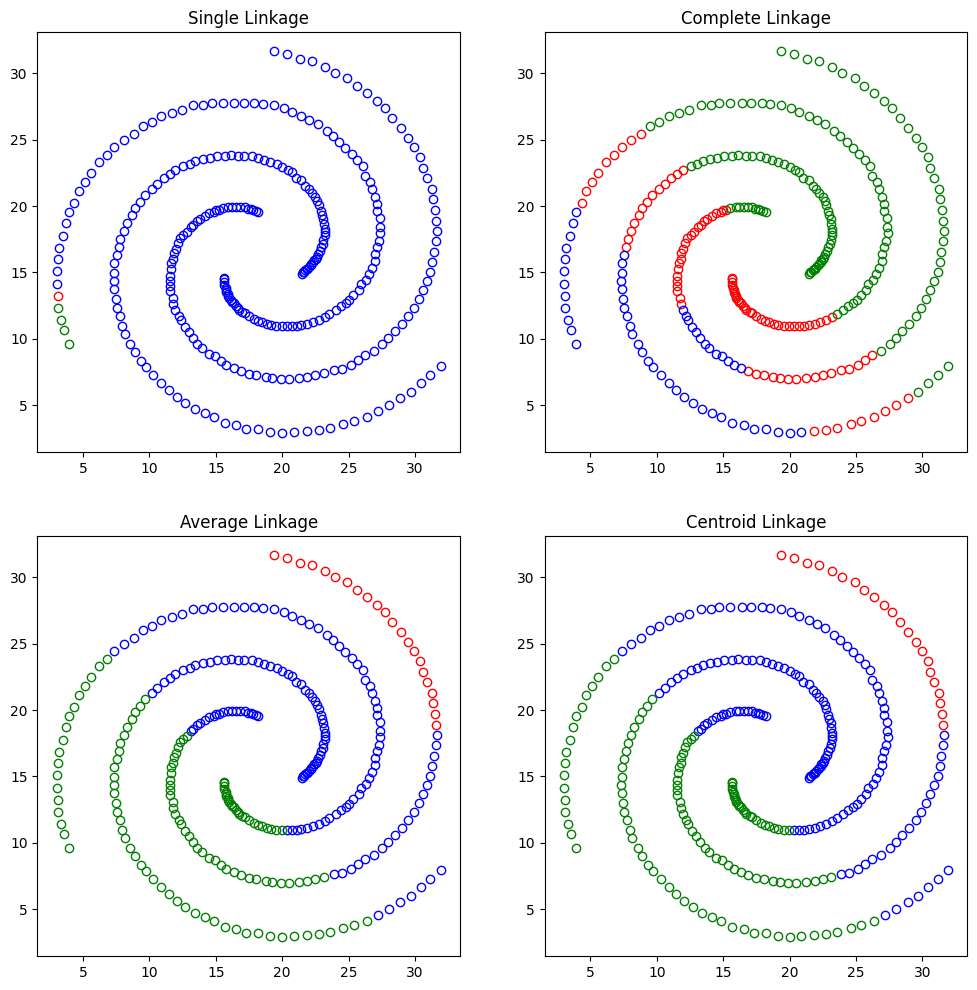

In [162]:
# draw the plots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].plot(single_x[0], single_y[0], 'o', markerfacecolor='none', markeredgecolor='red')
axs[0, 0].plot(single_x[1], single_y[1], 'o', markerfacecolor='none', markeredgecolor='blue')
axs[0, 0].plot(single_x[2], single_y[2], 'o', markerfacecolor='none', markeredgecolor='green')
axs[0, 0].set_title("Single Linkage")

axs[0, 1].plot(complete_x[0], complete_y[0], 'o', markerfacecolor='none', markeredgecolor='red')
axs[0, 1].plot(complete_x[1], complete_y[1], 'o', markerfacecolor='none', markeredgecolor='blue')
axs[0, 1].plot(complete_x[2], complete_y[2], 'o', markerfacecolor='none', markeredgecolor='green')
axs[0, 1].set_title("Complete Linkage")

axs[1, 0].plot(avg_x[0], avg_y[0], 'o', markerfacecolor='none', markeredgecolor='red')
axs[1, 0].plot(avg_x[1], avg_y[1], 'o', markerfacecolor='none', markeredgecolor='blue')
axs[1, 0].plot(avg_x[2], avg_y[2], 'o', markerfacecolor='none', markeredgecolor='green')
axs[1, 0].set_title("Average Linkage")

axs[1, 1].plot(centroid_x[0], centroid_y[0], 'o', markerfacecolor='none', markeredgecolor='red')
axs[1, 1].plot(centroid_x[1], centroid_y[1], 'o', markerfacecolor='none', markeredgecolor='blue')
axs[1, 1].plot(centroid_x[2], centroid_y[2], 'o', markerfacecolor='none', markeredgecolor='green')
axs[1, 1].set_title("Centroid Linkage")